In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import utils as u

import numpy as np
import pandas as pd
import utils as u
from scipy import interpolate as interp

In [2]:
filename = u.get_filename("D05")
basename = u.get_basename(filename)

In [3]:
def remove_motor_outliers(data: pd.DataFrame, topic: str, base_column: str = "time", threshold: int = 3000):
    corrected_df = data.copy()
    mask = corrected_df[topic] < threshold

    y_mask = corrected_df[topic][mask]
    x_mask = corrected_df[base_column][mask]

    x = corrected_df[base_column]

    f = interp.interp1d(x_mask, y_mask, fill_value="extrapolate")
    corrected_df[topic] = y = f(x)

    return corrected_df

rundir = u.get_rundir(basename)
merged_path = rundir / "merged"
merged_path.mkdir(parents=True, exist_ok=True)

elec_data = rundir / "elec"

dfs_paths = {
    "left_current": elec_data / f"{basename}_elec_left_drive_status_battery_current.csv",
    "left_voltage": elec_data / f"{basename}_elec_left_drive_status_battery_voltage.csv",
    "right_current": elec_data / f"{basename}_elec_right_drive_status_battery_current.csv",
    "right_voltage": elec_data / f"{basename}_elec_right_drive_status_battery_voltage.csv",
}
motor_dfs = {top: pd.read_csv(path) for top, path in dfs_paths.items()}

elec_topics = {
    "left_current": "/left_drive/status/battery_current",
    "left_voltage": "/left_drive/status/battery_voltage",
    "right_current": "/right_drive/status/battery_current",
    "right_voltage": "/right_drive/status/battery_voltage",
}

<AxesSubplot:>

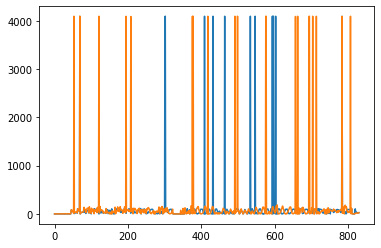

In [4]:
motor_dfs["left_current"][elec_topics["left_current"]].plot()
motor_dfs["right_current"][elec_topics["right_current"]].plot()

In [5]:
motor_dfs["left_current"] = remove_motor_outliers(motor_dfs["left_current"], elec_topics["left_current"])
motor_dfs["right_current"] = remove_motor_outliers(motor_dfs["right_current"], elec_topics["right_current"])

<AxesSubplot:>

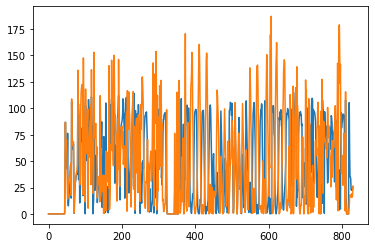

In [6]:
motor_dfs["left_current"][elec_topics["left_current"]].plot()
motor_dfs["right_current"][elec_topics["right_current"]].plot()
